In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("../final_figures/all_caqtls.scores.tsv", sep="\t")

In [3]:
data.columns

Index(['chr', 'pos', 'allele1', 'allele2', 'rsid', 'Esan.mean.logfc',
       'Esan.mean.abs_logfc', 'Esan.mean.jsd', 'Esan.mean.abs_logfc_x_jsd',
       'Esan.mean.abs_logfc_x_jsd_x_max_percentile',
       'Esan.mean.max_percentile', 'Esan.mean.abs_logfc.pval',
       'Esan.mean.jsd.pval', 'Esan.mean.abs_logfc_x_jsd.pval',
       'Esan.mean.abs_logfc_x_jsd_x_max_percentile.pval', 'Mende.mean.logfc',
       'Mende.mean.abs_logfc', 'Mende.mean.jsd', 'Mende.mean.abs_logfc.pval',
       'Mende.mean.jsd.pval', 'Yoruba.mean.logfc', 'Yoruba.mean.abs_logfc',
       'Yoruba.mean.jsd', 'Yoruba.mean.abs_logfc.pval', 'Yoruba.mean.jsd.pval',
       'GM12878.ENCSR095QNB.mean.logfc', 'GM12878.ENCSR095QNB.mean.abs_logfc',
       'GM12878.ENCSR095QNB.mean.jsd',
       'GM12878.ENCSR095QNB.mean.abs_logfc_x_jsd',
       'GM12878.ENCSR095QNB.mean.abs_logfc_x_jsd_x_max_percentile',
       'GM12878.ENCSR095QNB.mean.max_percentile',
       'GM12878.ENCSR095QNB.mean.abs_logfc.pval',
       'GM12878.ENCSR095QN

In [4]:
data.shape

(219382, 77)

In [5]:
import numpy as np
data_dnase = pd.read_csv("/mnt/lab_data2/anusri/enformer/eu_caqtls/chrombpnet_preds/dnase_preds/DNASE_NEW/summary.mean.variant_scores_new_3.tsv", sep="\t", header=0)
data_atac = pd.read_csv("/mnt/lab_data2/anusri/enformer/eu_caqtls/chrombpnet_preds/atac/ATAC/summary.mean.variant_scores_new_2.tsv", sep="\t", header=0)
data_atac_50m = pd.read_csv("/mnt/lab_data2/anusri/enformer/eu_caqtls/chrombpnet_preds/atac_50M/ATAC_50M/summary.mean.variant_scores_new_2.tsv", sep="\t", header=0)

In [6]:
vals = ['GM12878.ENCSR637XSC.mean.logfc', 'GM12878.ENCSR637XSC.mean.abs_logfc', 'GM12878.ENCSR637XSC.mean.jsd',
       'GM12878.ENCSR637XSC.mean.abs_logfc_x_jsd',
       'GM12878.ENCSR637XSC.mean.abs_logfc_x_jsd_x_max_percentile',
       'GM12878.ENCSR637XSC.mean.max_percentile',
       'GM12878.ENCSR637XSC.mean.abs_logfc.pval',
       'GM12878.ENCSR637XSC.mean.jsd.pval',
       'GM12878.ENCSR637XSC.mean.abs_logfc_x_jsd.pval',
       'GM12878.ENCSR637XSC.mean.abs_logfc_x_jsd_x_max_percentile.pval']

In [7]:
for val in vals:
    #print(val)
    if "pval" not in val:
        data[val] = data_atac[val.replace("GM12878.ENCSR637XSC.mean.", "")+".mean"]
    else:
        data[val] = data_atac[val.replace("GM12878.ENCSR637XSC.mean.", "").replace(".pval",".mean.pval")]

In [8]:
for val in vals:
    #print(val)
    if "pval" not in val:
        data[val.replace("ENCSR637XSC", "ENCSR637XSC.sub.50M")] = data_atac_50m[val.replace("GM12878.ENCSR637XSC.mean.", "")+".mean"]
    else:
        data[val.replace("ENCSR637XSC", "ENCSR637XSC.sub.50M")] = data_atac_50m[val.replace("GM12878.ENCSR637XSC.mean.", "").replace(".pval",".mean.pval")]

In [9]:
for val in vals:
    #print(val)
    if "pval" not in val:
        data[val.replace("ENCSR637XSC", "ENCSR000EMT")] = data_dnase[val.replace("GM12878.ENCSR637XSC.mean.", "")+".mean"]
    else:
        data[val.replace("ENCSR637XSC", "ENCSR000EMT")] = data_dnase[val.replace("GM12878.ENCSR637XSC.mean.", "").replace(".pval",".mean.pval")]

In [10]:
data[data.columns[0:70].tolist()+data.columns[77:].tolist()+data.columns[70:77].tolist()].shape

(219382, 97)

In [11]:
data[data.columns[0:5].tolist()+data.columns[70:77].tolist()]

,chr,pos,allele1,allele2,rsid,region,snp,distance,pval,beta,se,abs_beta
0,chr1,866281,C,T,1_866281_C_T,1:866099:866351,1_866281_C_T,181,0.974280,0.006546,0.202449,0.006546
1,chr1,866300,A,C,1_866300_A_C,1:866099:866351,1_866300_A_C,200,0.974280,0.006546,0.202449,0.006546
2,chr1,870176,T,A,1_870176_T_A,1:869800:870282,1_870176_T_A,375,0.071532,-0.250142,0.137133,0.250142
3,chr1,904947,G,A,1_904947_G_A,1:904938:905544,1_904947_G_A,8,0.290840,0.174397,0.164112,0.174397
4,chr1,905373,C,T,1_905373_T_C,1:904938:905544,1_905373_T_C,434,0.188152,-0.130176,0.098145,0.130176
...,...,...,...,...,...,...,...,...,...,...,...,...
219377,chr22,50627388,G,A,22_50627388_G_A,22:50627308:50627508,22_50627388_G_A,79,0.405697,-0.136940,0.163901,0.136940
219378,chr22,50628124,C,G,22_50628124_C_G,22:50627514:50628822,22_50628124_C_G,609,0.742636,0.021773,0.066098,0.021773
219379,chr22,50628493,G,A,22_50628493_G_A,22:50627514:50628822,22_50628493_G_A,978,0.729436,0.028973,0.083502,0.028973
219380,chr22,50628562,C,T,22_50628562_C_T,22:50627514:50628822,22_50628562_C_T,1047,0.191678,-0.076209,0.057921,0.076209


In [12]:
anscs = data.columns[5:70].tolist()+data.columns[77:].tolist()
anscs = [ans.split(".")[0] for ans in anscs]
anscs = set(anscs)
print(anscs)

sub_list = []
for ans in anscs:
    if ans == "GM12878":
        for title in [".ENCSR637XSC", ".ENCSR000EMT", ".ENCSR637XSC.sub.50M", ".ENCSR095QNB"]:
            sub_list.append(ans+title+".mean.logfc")
            data[ans+title+".mean.sign.jsd"] = np.sign(data[ans+title+".mean.logfc"]) * data[ans+title+".mean.jsd"]
            sub_list.append(ans+title+".mean.sign.jsd")
            sub_list.append(ans+title+".mean.abs_logfc_x_jsd_x_max_percentile")
            sub_list.append(ans+title+".mean.abs_logfc_x_jsd_x_max_percentile.pval")
    else:
        sub_list.append(ans+".mean.logfc")
        data[ans+".mean.sign.jsd"] = np.sign(data[ans+".mean.logfc"]) * data[ans+".mean.jsd"]
        sub_list.append(ans+".mean.sign.jsd")        

    

{'Gambian', 'eur', 'Luhya', 'Esan', 'GM12878', 'Yoruba', 'Maasai', 'afr', 'Mende'}


In [13]:
data = data[data.columns[0:5].tolist()+data.columns[70:77].tolist()+sub_list]
data.columns

Index(['chr', 'pos', 'allele1', 'allele2', 'rsid', 'region', 'snp', 'distance',
       'pval', 'beta', 'se', 'abs_beta', 'Gambian.mean.logfc',
       'Gambian.mean.sign.jsd', 'eur.mean.logfc', 'eur.mean.sign.jsd',
       'Luhya.mean.logfc', 'Luhya.mean.sign.jsd', 'Esan.mean.logfc',
       'Esan.mean.sign.jsd', 'GM12878.ENCSR637XSC.mean.logfc',
       'GM12878.ENCSR637XSC.mean.sign.jsd',
       'GM12878.ENCSR637XSC.mean.abs_logfc_x_jsd_x_max_percentile',
       'GM12878.ENCSR637XSC.mean.abs_logfc_x_jsd_x_max_percentile.pval',
       'GM12878.ENCSR000EMT.mean.logfc', 'GM12878.ENCSR000EMT.mean.sign.jsd',
       'GM12878.ENCSR000EMT.mean.abs_logfc_x_jsd_x_max_percentile',
       'GM12878.ENCSR000EMT.mean.abs_logfc_x_jsd_x_max_percentile.pval',
       'GM12878.ENCSR637XSC.sub.50M.mean.logfc',
       'GM12878.ENCSR637XSC.sub.50M.mean.sign.jsd',
       'GM12878.ENCSR637XSC.sub.50M.mean.abs_logfc_x_jsd_x_max_percentile',
       'GM12878.ENCSR637XSC.sub.50M.mean.abs_logfc_x_jsd_x_max_percentile

In [14]:
sig_data = pd.read_csv("../final_figures/af_caqtls/significant.caqtls.list.tsv", sep="\t")

In [15]:
print(min(sig_data["pval"]))
print(max(sig_data["pval"]))

2.92178e-41
9.99633e-06


In [16]:
sig_data.head()


,chr,pos,allele1,allele2,rsid,region,snp,distance,pval,beta,se,abs_beta
0,chr1,906982,C,T,1_906982_C_T,1:906596:907043,1_906982_C_T,385,4.802840e-06,-0.520262,0.106740,0.520262
1,chr1,921203,G,A,1_921203_G_A,1:921132:921332,1_921203_G_A,70,6.892040e-06,0.905971,0.189412,0.905971
2,chr1,976215,A,G,1_976215_A_G,1:975872:976361,1_976215_A_G,342,2.622420e-11,-0.615266,0.080637,0.615266
3,chr1,1038800,T,G,1_1038800_G_T,1:1038791:1039035,1_1038800_G_T,8,1.169820e-11,0.700579,0.089787,0.700579
4,chr1,1038819,T,C,1_1038819_C_T,1:1038791:1039035,1_1038819_C_T,27,1.169820e-11,0.700579,0.089787,0.700579


In [17]:
data["label"] = data["rsid"].isin(sig_data["rsid"])

In [18]:
data.shape

(219382, 45)

9.99633e-06
2.92178e-41


<AxesSubplot:>

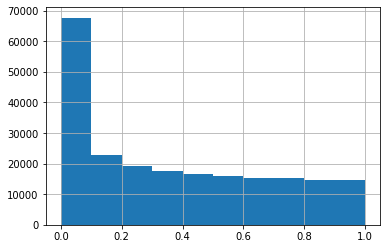

In [19]:
print(max(data[data["label"]]["pval"]))
print(min(data[data["label"]]["pval"]))
data["pval"].hist()

In [20]:
data["pos0"] = data["pos"] - 1
selected_beds = data[["chr", "pos0", "pos"]+data.columns[2:-1].tolist()]
selected_beds.head()


,chr,pos0,pos,allele1,allele2,rsid,region,snp,distance,pval,...,GM12878.ENCSR095QNB.mean.abs_logfc_x_jsd_x_max_percentile.pval,Yoruba.mean.logfc,Yoruba.mean.sign.jsd,Maasai.mean.logfc,Maasai.mean.sign.jsd,afr.mean.logfc,afr.mean.sign.jsd,Mende.mean.logfc,Mende.mean.sign.jsd,label
0,chr1,866280,866281,C,T,1_866281_C_T,1:866099:866351,1_866281_C_T,181,0.974280,...,0.192846,-0.027432,-0.010446,-0.012440,-0.008949,-0.019836,-0.009291,-0.030473,-0.007855,False
1,chr1,866299,866300,A,C,1_866300_A_C,1:866099:866351,1_866300_A_C,200,0.974280,...,0.328184,-0.000067,-0.008802,0.003003,0.007669,-0.000810,-0.008199,0.006495,0.007980,False
2,chr1,870175,870176,T,A,1_870176_T_A,1:869800:870282,1_870176_T_A,375,0.071532,...,0.048612,-0.002890,-0.011776,0.010434,0.010721,0.005320,0.012242,-0.005758,-0.012707,False
3,chr1,904946,904947,G,A,1_904947_G_A,1:904938:905544,1_904947_G_A,8,0.290840,...,0.131444,-0.034314,-0.012153,-0.027632,-0.010494,-0.025393,-0.010448,-0.004891,-0.012478,False
4,chr1,905372,905373,C,T,1_905373_T_C,1:904938:905544,1_905373_T_C,434,0.188152,...,0.018781,-0.100955,-0.016933,-0.084056,-0.013616,0.085157,0.015007,-0.070206,-0.015290,False


In [23]:
# find intersection with top 50k peaks per individual  ## this is the  top 50K for the Set Soumya gave
import pybedtools
beds_var = pybedtools.BedTool.from_dataframe(selected_beds)
peak_bed = pybedtools.BedTool('/mnt/lab_data2/anusri/chromatin-atlas-anvil/data/afgr_data/peak_files/merged.peaks.af.top.50k.bed')
sig_vars_in_bed = beds_var.intersect(peak_bed, c=True)

In [24]:
#sig_vars_in_bed.to_dataframe()

In [25]:
sig_vars_in_bed = sig_vars_in_bed.to_dataframe(names=selected_beds.columns.tolist() + ["count"])


In [26]:
sig_vars_in_bed["in_peaks"] = sig_vars_in_bed["count"]>0

In [27]:

sig_vars_in_bed.head(1)

,chr,pos0,pos,allele1,allele2,rsid,region,snp,distance,pval,...,Yoruba.mean.sign.jsd,Maasai.mean.logfc,Maasai.mean.sign.jsd,afr.mean.logfc,afr.mean.sign.jsd,Mende.mean.logfc,Mende.mean.sign.jsd,label,count,in_peaks
0,chr1,866280,866281,C,T,1_866281_C_T,1:866099:866351,1_866281_C_T,181,0.97428,...,-0.010446,-0.01244,-0.008949,-0.019836,-0.009291,-0.030473,-0.007855,False,0,False


In [28]:
sum(sig_vars_in_bed["in_peaks"])

90158

In [29]:
sum(sig_vars_in_bed[sig_vars_in_bed["in_peaks"]]["label"])

6827

In [30]:
sig_vars_in_bed[sig_vars_in_bed["in_peaks"]]["label"].shape

(90158,)

In [31]:
sig_vars_in_bed.shape

(219382, 48)

In [32]:
## set of extra variants for which enformer predictions were calculated
#sig_vars_in_bed[['chr', 'pos', 'allele1', 'allele2', "label"]].to_csv("/mnt/lab_data2/anusri/enformer/eu_caqtls/source2_new_filter.tsv", sep="\t", header=True, index=False)



In [33]:
# import pybedtools
# beds_var = pybedtools.BedTool.from_dataframe(selected_beds)
# peak_bed = pybedtools.BedTool('af_caqtls/merged.peaks.af.bed')
# sig_vars_in_bed = beds_var.intersect(peak_bed, wa=True)

In [34]:
# sig_vars_in_bed = sig_vars_in_bed.to_dataframe(names=["chr", "pos0", "pos"]+data.columns[2:-1].tolist()).drop_duplicates()


In [35]:
# sig_vars_in_bed.shape

In [36]:
# data.shape

In [37]:
# sum(sig_vars_in_bed["label"]==1)

In [38]:
#sig_vars_in_bed[['chr', 'pos', 'allele1', 'allele2', "label"]].to_csv("/mnt/lab_data2/anusri/enformer/eu_caqtls/source2.tsv", sep="\t", header=True, index=False)

In [39]:
#enforer_recomputed_preds (we first computed enformer scores on the orignal african merged peaks, so load them)
import pickle as pkl
import os

mean_change=[]
rsids=[]

enf_dir="/mnt/lab_data2/anusri/variant-scorer/src/output/afr_caqtls_window/"
for diri in ["splitaa", "splitab", "splitac"]:
    enformer_recompute = pkl.load(open(enf_dir+diri+"/predictions_at_snp.pkl",'rb'))
    for i in range(enformer_recompute["ref_logcount_preds"].shape[0]):
        mean_change.append(np.log2( (enformer_recompute["ref_logcount_preds"][i,440+4:456-4].sum()+1) / (enformer_recompute["alt_logcount_preds"][i,440+4:456-4].sum()+1)))
        rsids.append(enformer_recompute["rsids"][i])
mean_change = np.array(mean_change)


In [40]:
mean_change.shape

(116499,)

In [41]:
rsids[0]

'chr1_870175_T_A_False'

In [42]:
sig_vars_in_bed.shape

(219382, 48)

In [43]:
sig_vars_in_bed.head()

,chr,pos0,pos,allele1,allele2,rsid,region,snp,distance,pval,...,Yoruba.mean.sign.jsd,Maasai.mean.logfc,Maasai.mean.sign.jsd,afr.mean.logfc,afr.mean.sign.jsd,Mende.mean.logfc,Mende.mean.sign.jsd,label,count,in_peaks
0,chr1,866280,866281,C,T,1_866281_C_T,1:866099:866351,1_866281_C_T,181,0.974280,...,-0.010446,-0.012440,-0.008949,-0.019836,-0.009291,-0.030473,-0.007855,False,0,False
1,chr1,866299,866300,A,C,1_866300_A_C,1:866099:866351,1_866300_A_C,200,0.974280,...,-0.008802,0.003003,0.007669,-0.000810,-0.008199,0.006495,0.007980,False,0,False
2,chr1,870175,870176,T,A,1_870176_T_A,1:869800:870282,1_870176_T_A,375,0.071532,...,-0.011776,0.010434,0.010721,0.005320,0.012242,-0.005758,-0.012707,False,0,False
3,chr1,904946,904947,G,A,1_904947_G_A,1:904938:905544,1_904947_G_A,8,0.290840,...,-0.012153,-0.027632,-0.010494,-0.025393,-0.010448,-0.004891,-0.012478,False,0,False
4,chr1,905372,905373,C,T,1_905373_T_C,1:904938:905544,1_905373_T_C,434,0.188152,...,-0.016933,-0.084056,-0.013616,0.085157,0.015007,-0.070206,-0.015290,False,1,True


In [44]:

orig_source = pd.read_csv("/mnt/lab_data2/anusri/enformer/eu_caqtls/source2.tsv", sep="\t", header=0)


In [45]:
orig_source.shape

(116499, 5)

In [46]:
orig_source.head()

,chr,pos,allele1,allele2,label
0,chr1,870176,T,A,False
1,chr1,905373,C,T,False
2,chr1,906870,A,G,False
3,chr1,906982,C,T,True
4,chr1,921203,G,A,True


In [47]:
orig_source["enformer_recomputed"] = mean_change

In [48]:
selected_beds_new = data.merge(orig_source, how='left', right_on=['chr', 'pos', 'allele1', 'allele2', "label"], left_on=['chr', 'pos', 'allele1', 'allele2', "label"])


In [49]:
data.shape

(219382, 46)

In [50]:
selected_beds_new.shape

(219382, 47)

In [51]:
selected_beds_new.shape

(219382, 47)

In [52]:
selected_beds.shape

(219382, 46)

In [53]:
sum(~np.isnan(selected_beds_new["enformer_recomputed"]))

116499

In [54]:
data = selected_beds_new

In [55]:
data.shape

(219382, 47)

In [56]:
data.head()

,chr,pos,allele1,allele2,rsid,region,snp,distance,pval,beta,...,Yoruba.mean.sign.jsd,Maasai.mean.logfc,Maasai.mean.sign.jsd,afr.mean.logfc,afr.mean.sign.jsd,Mende.mean.logfc,Mende.mean.sign.jsd,label,pos0,enformer_recomputed
0,chr1,866281,C,T,1_866281_C_T,1:866099:866351,1_866281_C_T,181,0.974280,0.006546,...,-0.010446,-0.012440,-0.008949,-0.019836,-0.009291,-0.030473,-0.007855,False,866280,NaN
1,chr1,866300,A,C,1_866300_A_C,1:866099:866351,1_866300_A_C,200,0.974280,0.006546,...,-0.008802,0.003003,0.007669,-0.000810,-0.008199,0.006495,0.007980,False,866299,NaN
2,chr1,870176,T,A,1_870176_T_A,1:869800:870282,1_870176_T_A,375,0.071532,-0.250142,...,-0.011776,0.010434,0.010721,0.005320,0.012242,-0.005758,-0.012707,False,870175,-0.002500
3,chr1,904947,G,A,1_904947_G_A,1:904938:905544,1_904947_G_A,8,0.290840,0.174397,...,-0.012153,-0.027632,-0.010494,-0.025393,-0.010448,-0.004891,-0.012478,False,904946,NaN
4,chr1,905373,C,T,1_905373_T_C,1:904938:905544,1_905373_T_C,434,0.188152,-0.130176,...,-0.016933,-0.084056,-0.013616,0.085157,0.015007,-0.070206,-0.015290,False,905372,-0.023977


In [57]:
data.shape

(219382, 47)

In [58]:
sig_vars_in_bed.shape

(219382, 48)

In [59]:
data["in_peaks"] = sig_vars_in_bed["in_peaks"]

In [60]:
sum(~np.isnan(data["enformer_recomputed"]))

116499

In [61]:
sum((~np.isnan(data["enformer_recomputed"]))&(data["in_peaks"]))

67362

In [62]:
sum((np.isnan(data["enformer_recomputed"]))&(data["in_peaks"])) # number of values for which in_peaks is true but we dont have enformer computations

22796

In [63]:
sum(~np.isnan(data["enformer_recomputed"]))

116499

In [64]:
#data[(np.isnan(data["enformer_recomputed"]))&(data["in_peaks"])][['chr', 'pos', 'allele1', 'allele2', "label"]].to_csv("/mnt/lab_data2/anusri/enformer/eu_caqtls/source2_new_filter.tsv", sep="\t", header=True, index=False)



In [65]:
#data[['chr', 'pos', 'allele1', 'allele2', "label"]].to_csv("/mnt/lab_data2/anusri/enformer/eu_caqtls/source2_new_filter_full.tsv", sep="\t", header=True, index=False)

# we stored these 22796 and recomputed enformer scores for them

In [66]:
#enforer_recomputed_preds
import pickle as pkl
import os

mean_change=[]
rsids=[]

enf_dir="/mnt/lab_data2/anusri/variant-scorer/src/output/afr_caqtls_window_new_filter/"
for diri in [""]:
    enformer_recompute = pkl.load(open(enf_dir+diri+"/predictions_at_snp.pkl",'rb'))
    for i in range(enformer_recompute["ref_logcount_preds"].shape[0]):
        mean_change.append(np.log2( (enformer_recompute["ref_logcount_preds"][i,440+4:456-4].sum()+1) / (enformer_recompute["alt_logcount_preds"][i,440+4:456-4].sum()+1)))
        rsids.append(enformer_recompute["rsids"][i])
mean_change = np.array(mean_change)


In [67]:
mean_change.shape

(22796,)

In [68]:
orig_source2 = pd.read_csv("/mnt/lab_data2/anusri/enformer/eu_caqtls/source2_new_filter.tsv", sep="\t", header=0)


In [69]:
orig_source2.shape

(22796, 5)

In [70]:
orig_source2["enformer_recomputed"] = mean_change

In [71]:
selected_beds_new_2 = data.merge(orig_source2, how='left', right_on=['chr', 'pos', 'allele1', 'allele2', "label"], left_on=['chr', 'pos', 'allele1', 'allele2', "label"])


In [72]:
data = selected_beds_new_2

In [73]:
data.shape

(219382, 49)

In [74]:
# merge both the values
data.loc[np.isnan(data["enformer_recomputed_x"]),"enformer_recomputed_x"] = data[np.isnan(data["enformer_recomputed_x"])]["enformer_recomputed_y"] 


In [75]:
sum((np.isnan(data["enformer_recomputed_x"]))&(data["in_peaks"])) # make sure all in_peaks files have enformer predictions




0

In [76]:
rsid_map = pd.read_csv("/mnt/lab_data2/anusri/enformer/eu_caqtls/convert_hg38_to_hg19/hg38_rsids2_new_filter_full.bed", sep="\t", header=None)
rsid_map["rsid"] = rsid_map[0] + "_" + rsid_map[2].astype(str) + "_" + rsid_map[3] + "_" + rsid_map[4] 
rsid_map_dict = {}
for i,r in rsid_map.iterrows():
    rsid_map_dict[r[9]] = r["rsid"]
enformer_predictions = pd.read_csv("/mnt/lab_data2/anusri/enformer/eu_caqtls/enformer_predictions2_full.tsv", sep="\t", header=0).drop_duplicates()
enformer_predictions.shape

(219592, 7)

In [77]:
enformer_predictions.head()

,chr,pos,ref,alt,rsid,DNASE_SAD,DNASE_SAR
0,chr1,801661,C,T,rs12132974,0.000051,0.000068
1,chr1,801680,A,C,rs12134490,0.000039,0.000052
2,chr1,805556,T,A,rs72631880,-0.000139,-0.000184
3,chr1,840327,G,A,rs28625089,-0.000002,-0.000002
4,chr1,840753,T,C,rs4970382,-0.000071,-0.000095


In [78]:
enformer_predictions["rsid1"] = enformer_predictions["rsid"].map(rsid_map_dict)

In [79]:
enformer_predictions["RA1"] = enformer_predictions["ref"]+"_"+enformer_predictions["alt"]
enformer_predictions["RA3"] = enformer_predictions["alt"]+"_"+enformer_predictions["ref"]
enformer_predictions["RA2"] = enformer_predictions["rsid1"].str.split("_").str[2:4].apply('_'.join)
enformer_predictions["id_hg19"] = enformer_predictions["chr"]+"_"+enformer_predictions["pos"].astype(str)+"_"+enformer_predictions["ref"]+"_"+enformer_predictions["alt"]

# Enformer predicitons are scores as alt/ref but the ground truth is with respect to allel2 by allele1 in rsid column
# when alt is allele2 keep the sign, when alt is allele1 flip the allele
enformer_predictions1 = enformer_predictions[enformer_predictions["RA1"] == enformer_predictions["RA2"]]
enformer_predictions2 = enformer_predictions[enformer_predictions["RA3"] == enformer_predictions["RA2"]]
enformer_predictions2.loc[:,"DNASE_SAD"] = -1*enformer_predictions2["DNASE_SAD"] 
enformer_predictions2.loc[:,"DNASE_SAR"] = -1*enformer_predictions2["DNASE_SAR"] 

enformer_predictions_new = pd.concat([enformer_predictions2, enformer_predictions1])

print(enformer_predictions_new.shape)

data["rsid_temp"] = data["chr"] + "_" + data["pos"].astype(str) + "_" + data["allele1"] + "_" + data["allele2"]

dataf = data.merge(enformer_predictions_new, left_on="rsid_temp", right_on="rsid1", how="left").drop_duplicates()

print(dataf.shape)



/users/anusri/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


(219131, 12)
(219382, 62)


In [80]:
sum(~np.isnan(dataf["DNASE_SAD"]))

219131

In [81]:
#dataf.columns

In [82]:
sum(~np.isnan(dataf["DNASE_SAD"]) & dataf["in_peaks"])

90079

In [83]:
sum(dataf[~np.isnan(dataf["DNASE_SAD"]) & dataf["in_peaks"]]["label"])

6826

In [84]:
sum(~np.isnan(dataf["DNASE_SAR"]))

219131

In [85]:
sum(~np.isnan(dataf["DNASE_SAR"]))

219131

In [86]:
sum(dataf[~np.isnan(dataf["DNASE_SAR"])]["label"])

11084

In [87]:
sum(dataf[~np.isnan(dataf["DNASE_SAR"])]["label"])

11084

In [88]:
sum(dataf[~np.isnan(dataf["DNASE_SAR"])]["pval"]>1e-3)

198353

In [89]:
np.round(sum(dataf[~np.isnan(dataf["DNASE_SAR"])]["label"])/sum(dataf[~np.isnan(dataf["DNASE_SAR"])]["pval"]>1e-3),2)

0.06

In [90]:
dataf.head()

,chr_x,pos_x,allele1,allele2,rsid_x,region,snp,distance,pval,beta,...,ref,alt,rsid_y,DNASE_SAD,DNASE_SAR,rsid1,RA1,RA3,RA2,id_hg19
0,chr1,866281,C,T,1_866281_C_T,1:866099:866351,1_866281_C_T,181,0.974280,0.006546,...,C,T,rs12132974,0.000051,0.000068,chr1_866281_C_T,C_T,T_C,C_T,chr1_801661_C_T
1,chr1,866300,A,C,1_866300_A_C,1:866099:866351,1_866300_A_C,200,0.974280,0.006546,...,A,C,rs12134490,0.000039,0.000052,chr1_866300_A_C,A_C,C_A,A_C,chr1_801680_A_C
2,chr1,870176,T,A,1_870176_T_A,1:869800:870282,1_870176_T_A,375,0.071532,-0.250142,...,T,A,rs72631880,-0.000139,-0.000184,chr1_870176_T_A,T_A,A_T,T_A,chr1_805556_T_A
3,chr1,904947,G,A,1_904947_G_A,1:904938:905544,1_904947_G_A,8,0.290840,0.174397,...,G,A,rs28625089,-0.000002,-0.000002,chr1_904947_G_A,G_A,A_G,G_A,chr1_840327_G_A
4,chr1,905373,C,T,1_905373_T_C,1:904938:905544,1_905373_T_C,434,0.188152,-0.130176,...,T,C,rs4970382,0.000071,0.000095,chr1_905373_C_T,T_C,C_T,C_T,chr1_840753_T_C


In [92]:
import pybedtools

fft = selected_beds["region"].str.split(":", expand=True)
fft[0] = "chr"+fft[0]
beds_var1 = pybedtools.BedTool.from_dataframe(selected_beds)
peak_bed1 = pybedtools.BedTool.from_dataframe(fft)
temps = beds_var1.intersect(peak_bed1, c=True)


In [93]:
temps1 = temps.to_dataframe(names=selected_beds.columns.tolist()+["counts"]).drop_duplicates()


In [94]:
temps1.shape

(219382, 47)

In [95]:
sum(temps1["counts"] > 0)

218803

In [96]:
sum((~np.isnan(dataf["DNASE_SAR"])) & (dataf["pval"]>1e-3) &  (temps1["counts"] > 0))

197804

In [97]:
dataf["IsUsed"] = False
# dataf.loc[(~np.isnan(dataf["DNASE_SAR"])) & (dataf["label"]==1) & (temps1["counts"] > 0), "IsUsed"] = True
# dataf.loc[(~np.isnan(dataf["DNASE_SAR"])) & (dataf["pval"]>1e-3) & (temps1["counts"] > 0), "IsUsed"] = True
# dataf.loc[(~np.isnan(dataf["DNASE_SAR"])) & (dataf["label"]==1) & dataf["in_peaks"] &  (temps1["counts"] > 0), "IsUsed"] = True
# dataf.loc[(~np.isnan(dataf["DNASE_SAR"])) & (dataf["pval"]>1e-3) & dataf["in_peaks"] & (temps1["counts"] > 0), "IsUsed"] = True
dataf.loc[(~np.isnan(dataf["DNASE_SAR"])) & (dataf["label"]==1) & dataf["in_peaks"] &  (temps1["counts"] > 0), "IsUsed"] = True
dataf.loc[(~np.isnan(dataf["DNASE_SAR"])) & (dataf["pval"]>1e-2) & dataf["in_peaks"] & (temps1["counts"] > 0), "IsUsed"] = True


In [98]:
dataf.columns

Index(['chr_x', 'pos_x', 'allele1', 'allele2', 'rsid_x', 'region', 'snp',
       'distance', 'pval', 'beta', 'se', 'abs_beta', 'Gambian.mean.logfc',
       'Gambian.mean.sign.jsd', 'eur.mean.logfc', 'eur.mean.sign.jsd',
       'Luhya.mean.logfc', 'Luhya.mean.sign.jsd', 'Esan.mean.logfc',
       'Esan.mean.sign.jsd', 'GM12878.ENCSR637XSC.mean.logfc',
       'GM12878.ENCSR637XSC.mean.sign.jsd',
       'GM12878.ENCSR637XSC.mean.abs_logfc_x_jsd_x_max_percentile',
       'GM12878.ENCSR637XSC.mean.abs_logfc_x_jsd_x_max_percentile.pval',
       'GM12878.ENCSR000EMT.mean.logfc', 'GM12878.ENCSR000EMT.mean.sign.jsd',
       'GM12878.ENCSR000EMT.mean.abs_logfc_x_jsd_x_max_percentile',
       'GM12878.ENCSR000EMT.mean.abs_logfc_x_jsd_x_max_percentile.pval',
       'GM12878.ENCSR637XSC.sub.50M.mean.logfc',
       'GM12878.ENCSR637XSC.sub.50M.mean.sign.jsd',
       'GM12878.ENCSR637XSC.sub.50M.mean.abs_logfc_x_jsd_x_max_percentile',
       'GM12878.ENCSR637XSC.sub.50M.mean.abs_logfc_x_jsd_x_max_perc

In [99]:
sum((temps1["counts"] > 0) & (~np.isnan(dataf["DNASE_SAR"])) & dataf["in_peaks"])

89909

In [100]:
sum(dataf[(temps1["counts"] > 0) & (~np.isnan(dataf["DNASE_SAR"])) & dataf["in_peaks"]]["label"])

6821

In [101]:
sum((temps1["counts"] > 0) & (~np.isnan(dataf["DNASE_SAR"])) & dataf["in_peaks"] & (dataf["pval"]>1e-3))

77999

In [102]:
6821/(77999+6821)

0.08041735439754776

In [103]:
77999+6821

84820

In [104]:
sum(dataf["IsUsed"])

79026

In [105]:
sum(dataf["in_peaks"])

90158

In [106]:
dataf.shape

(219382, 63)

In [107]:
sum(dataf["IsUsed"]&dataf["in_peaks"])

79026

In [108]:
sum(dataf[dataf["in_peaks"]]["label"]==1)

6827

In [109]:
sum(dataf[dataf["in_peaks"]]["label"]==0)

83331

In [110]:
np.round(sum(dataf[dataf["IsUsed"]]["label"]==1)/sum(dataf["IsUsed"]),2)

0.09

In [111]:
sum(dataf[dataf["IsUsed"]]["label"]==1)/sum(dataf["IsUsed"])

0.08631336522157265

In [112]:
#sum(dataf["IsUsed"]) # 109707

In [113]:
#sum(dataf[dataf["IsUsed"]]["label"]==1) # 8366

In [114]:
#sum(dataf[dataf["IsUsed"]]["label"]==0) # 8366

In [115]:
# the ground truths are flipped when rsid does not match allele2 and allele
index=(dataf["allele1"] != (dataf["rsid_x"].str.split('_').str[2]))
index=np.array(index.values)

dataf.loc[index,"beta"] = -1 * dataf.loc[index,"beta"]

dataf.loc[:,"enformer_recomputed_x"] = -1 * dataf.loc[:,"enformer_recomputed_x"]
# dataf.loc[index,"enformer_recomputed_x"] = -1 * dataf.loc[index,"enformer_recomputed_x"]
# for ans in anscs:
#     if ans=="eur":
#         continue
#     if ans=="afr":
#         continue       
#     print(ans)
#     if ans == "GM12878":
#         for title in [".ENCSR637XSC", ".ENCSR000EMT", ".ENCSR637XSC.sub.50M", ".ENCSR095QNB" ]:
#             print(title)
#             dataf.loc[index,ans+title+".mean.sign.jsd"] = -1 * dataf.loc[index,ans+title+".mean.sign.jsd"]
#             dataf.loc[index,ans+title+".mean.logfc"] = -1 * dataf.loc[index,ans+title+".mean.logfc"]
            
#     else:
#         title=""
#         dataf.loc[index,ans+title+".mean.sign.jsd"] = -1 * dataf.loc[index,ans+title+".mean.sign.jsd"]
#         dataf.loc[index,ans+title+".mean.logfc"] = -1 * dataf.loc[index,ans+title+".mean.logfc"]

In [116]:
# dataf.loc[index,"DNASE_SAD"] = -1 * dataf.loc[index,"DNASE_SAD"]
# dataf.loc[index,"DNASE_SAR"] = -1 * dataf.loc[index,"DNASE_SAR"]

In [117]:
dataf.columns

Index(['chr_x', 'pos_x', 'allele1', 'allele2', 'rsid_x', 'region', 'snp',
       'distance', 'pval', 'beta', 'se', 'abs_beta', 'Gambian.mean.logfc',
       'Gambian.mean.sign.jsd', 'eur.mean.logfc', 'eur.mean.sign.jsd',
       'Luhya.mean.logfc', 'Luhya.mean.sign.jsd', 'Esan.mean.logfc',
       'Esan.mean.sign.jsd', 'GM12878.ENCSR637XSC.mean.logfc',
       'GM12878.ENCSR637XSC.mean.sign.jsd',
       'GM12878.ENCSR637XSC.mean.abs_logfc_x_jsd_x_max_percentile',
       'GM12878.ENCSR637XSC.mean.abs_logfc_x_jsd_x_max_percentile.pval',
       'GM12878.ENCSR000EMT.mean.logfc', 'GM12878.ENCSR000EMT.mean.sign.jsd',
       'GM12878.ENCSR000EMT.mean.abs_logfc_x_jsd_x_max_percentile',
       'GM12878.ENCSR000EMT.mean.abs_logfc_x_jsd_x_max_percentile.pval',
       'GM12878.ENCSR637XSC.sub.50M.mean.logfc',
       'GM12878.ENCSR637XSC.sub.50M.mean.sign.jsd',
       'GM12878.ENCSR637XSC.sub.50M.mean.abs_logfc_x_jsd_x_max_percentile',
       'GM12878.ENCSR637XSC.sub.50M.mean.abs_logfc_x_jsd_x_max_perc

In [118]:
dataf["rsid_y"]

0          rs12132974
1          rs12134490
2          rs72631880
3          rs28625089
4           rs4970382
             ...     
219377      rs6151410
219378      rs6151406
219379       rs131715
219380       rs762668
219381    rs115055839
Name: rsid_y, Length: 219382, dtype: object

In [119]:
dataf.columns

Index(['chr_x', 'pos_x', 'allele1', 'allele2', 'rsid_x', 'region', 'snp',
       'distance', 'pval', 'beta', 'se', 'abs_beta', 'Gambian.mean.logfc',
       'Gambian.mean.sign.jsd', 'eur.mean.logfc', 'eur.mean.sign.jsd',
       'Luhya.mean.logfc', 'Luhya.mean.sign.jsd', 'Esan.mean.logfc',
       'Esan.mean.sign.jsd', 'GM12878.ENCSR637XSC.mean.logfc',
       'GM12878.ENCSR637XSC.mean.sign.jsd',
       'GM12878.ENCSR637XSC.mean.abs_logfc_x_jsd_x_max_percentile',
       'GM12878.ENCSR637XSC.mean.abs_logfc_x_jsd_x_max_percentile.pval',
       'GM12878.ENCSR000EMT.mean.logfc', 'GM12878.ENCSR000EMT.mean.sign.jsd',
       'GM12878.ENCSR000EMT.mean.abs_logfc_x_jsd_x_max_percentile',
       'GM12878.ENCSR000EMT.mean.abs_logfc_x_jsd_x_max_percentile.pval',
       'GM12878.ENCSR637XSC.sub.50M.mean.logfc',
       'GM12878.ENCSR637XSC.sub.50M.mean.sign.jsd',
       'GM12878.ENCSR637XSC.sub.50M.mean.abs_logfc_x_jsd_x_max_percentile',
       'GM12878.ENCSR637XSC.sub.50M.mean.abs_logfc_x_jsd_x_max_perc

In [120]:
datafinal = dataf[['chr_x', 'pos_x', 'allele1', 'allele2', 'rsid_x', 'label',  'IsUsed', 'pval', 'beta','rsid_y', 'region', 'snp',
       'distance', 'se', 'abs_beta', 'DNASE_SAD', 'DNASE_SAR', 'enformer_recomputed_x',
       'Gambian.mean.logfc', 'Gambian.mean.sign.jsd',
        'Esan.mean.logfc', 'Esan.mean.sign.jsd', 
        'Mende.mean.logfc', 'Mende.mean.sign.jsd',
       'Yoruba.mean.logfc', 'Yoruba.mean.sign.jsd',
        'Maasai.mean.logfc', 'Maasai.mean.sign.jsd', 
        'Luhya.mean.logfc', 'Luhya.mean.sign.jsd', 
       'GM12878.ENCSR637XSC.mean.logfc', 'GM12878.ENCSR637XSC.mean.sign.jsd',
       'GM12878.ENCSR637XSC.mean.abs_logfc_x_jsd_x_max_percentile',
       'GM12878.ENCSR000EMT.mean.logfc', 'GM12878.ENCSR000EMT.mean.sign.jsd',
       'GM12878.ENCSR000EMT.mean.abs_logfc_x_jsd_x_max_percentile',
       'GM12878.ENCSR637XSC.sub.50M.mean.logfc',
       'GM12878.ENCSR637XSC.sub.50M.mean.sign.jsd',
       'GM12878.ENCSR637XSC.sub.50M.mean.abs_logfc_x_jsd_x_max_percentile',
]]

In [121]:
datafinal[['chr_x', 'pos_x', 'allele1', 'allele2', 'rsid_x', 'label',  'IsUsed', 'pval', 'beta','rsid_y', 'region', 'snp',
       'distance', 'se', 'abs_beta']]

,chr_x,pos_x,allele1,allele2,rsid_x,label,IsUsed,pval,beta,rsid_y,region,snp,distance,se,abs_beta
0,chr1,866281,C,T,1_866281_C_T,False,False,0.974280,0.006546,rs12132974,1:866099:866351,1_866281_C_T,181,0.202449,0.006546
1,chr1,866300,A,C,1_866300_A_C,False,False,0.974280,0.006546,rs12134490,1:866099:866351,1_866300_A_C,200,0.202449,0.006546
2,chr1,870176,T,A,1_870176_T_A,False,False,0.071532,-0.250142,rs72631880,1:869800:870282,1_870176_T_A,375,0.137133,0.250142
3,chr1,904947,G,A,1_904947_G_A,False,False,0.290840,0.174397,rs28625089,1:904938:905544,1_904947_G_A,8,0.164112,0.174397
4,chr1,905373,C,T,1_905373_T_C,False,True,0.188152,0.130176,rs4970382,1:904938:905544,1_905373_T_C,434,0.098145,0.130176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219377,chr22,50627388,G,A,22_50627388_G_A,False,False,0.405697,-0.136940,rs6151410,22:50627308:50627508,22_50627388_G_A,79,0.163901,0.136940
219378,chr22,50628124,C,G,22_50628124_C_G,False,True,0.742636,0.021773,rs6151406,22:50627514:50628822,22_50628124_C_G,609,0.066098,0.021773
219379,chr22,50628493,G,A,22_50628493_G_A,False,True,0.729436,0.028973,rs131715,22:50627514:50628822,22_50628493_G_A,978,0.083502,0.028973
219380,chr22,50628562,C,T,22_50628562_C_T,False,True,0.191678,-0.076209,rs762668,22:50627514:50628822,22_50628562_C_T,1047,0.057921,0.076209


In [122]:
rename_dict = {"chr_x": "var.chr", "pos_x": "var.pos_hg38", "IsUsed":"var.isused", "rsid_x": "var.snp_id", "rsid_y": "var.dbsnp_rsid", 
               'region': 'var.region' , 'snp': 'var.snp', 'distance': 'obs.distance', 'se': 'obs.se', 'abs_beta': 'obs.abs_beta',
               'pval': 'obs.pval', 'beta': 'obs.beta', 'label': 'obs.label', 'allele1':'var.allele1', 'allele2': 'var.allele2',
               'enformer_recomputed_x':"pred.enformer.encsr000emt.variantscore.local_logfc", "DNASE_SAR": "pred.enformer.encsr000emt.variantscore.global_sar", "DNASE_SAD": "pred.enformer.encsr000emt.variantscore.global_sad"}

anc_data = ['Gambian.mean.logfc', 'Gambian.mean.sign.jsd',
        'Esan.mean.logfc', 'Esan.mean.sign.jsd', 
        'Mende.mean.logfc', 'Mende.mean.sign.jsd',
       'Yoruba.mean.logfc', 'Yoruba.mean.sign.jsd',
        'Maasai.mean.logfc', 'Maasai.mean.sign.jsd', 
        'Luhya.mean.logfc', 'Luhya.mean.sign.jsd', 
       'GM12878.ENCSR637XSC.mean.logfc', 'GM12878.ENCSR637XSC.mean.sign.jsd',
       'GM12878.ENCSR637XSC.mean.abs_logfc_x_jsd_x_max_percentile',
       'GM12878.ENCSR000EMT.mean.logfc', 'GM12878.ENCSR000EMT.mean.sign.jsd',
       'GM12878.ENCSR000EMT.mean.abs_logfc_x_jsd_x_max_percentile',
       'GM12878.ENCSR637XSC.sub.50M.mean.logfc',
       'GM12878.ENCSR637XSC.sub.50M.mean.sign.jsd',
       'GM12878.ENCSR637XSC.sub.50M.mean.abs_logfc_x_jsd_x_max_percentile',
        ]

for dt in anc_data:
    vals = dt.split(".")
    if vals[0] == "GM12878":
        popn=vals[1].lower()
        if vals[2] == "sub":
            popn=vals[1].lower()+"_50m"
    else:
        popn=vals[0].lower()
    if vals[-1] == "logfc":
        sc="logfc"
    elif vals[-1] == "jsd":
        sc="jsd"
    elif vals[-1] == "abs_logfc_x_jsd_x_max_percentile":
        sc="ips"   
    elif vals[-1] == "pval" and vals[-2] == "abs_logfc_x_jsd_x_max_percentile":
        sc="pval"
    else:
        print(vals[-1])
    rename_dict[dt] = "pred.chrombpnet."+popn+".variantscore."+sc
        
rename_dict

{'chr_x': 'var.chr',
 'pos_x': 'var.pos_hg38',
 'IsUsed': 'var.isused',
 'rsid_x': 'var.snp_id',
 'rsid_y': 'var.dbsnp_rsid',
 'region': 'var.region',
 'snp': 'var.snp',
 'distance': 'obs.distance',
 'se': 'obs.se',
 'abs_beta': 'obs.abs_beta',
 'pval': 'obs.pval',
 'beta': 'obs.beta',
 'label': 'obs.label',
 'allele1': 'var.allele1',
 'allele2': 'var.allele2',
 'enformer_recomputed_x': 'pred.enformer.encsr000emt.variantscore.local_logfc',
 'DNASE_SAR': 'pred.enformer.encsr000emt.variantscore.global_sar',
 'DNASE_SAD': 'pred.enformer.encsr000emt.variantscore.global_sad',
 'Gambian.mean.logfc': 'pred.chrombpnet.gambian.variantscore.logfc',
 'Gambian.mean.sign.jsd': 'pred.chrombpnet.gambian.variantscore.jsd',
 'Esan.mean.logfc': 'pred.chrombpnet.esan.variantscore.logfc',
 'Esan.mean.sign.jsd': 'pred.chrombpnet.esan.variantscore.jsd',
 'Mende.mean.logfc': 'pred.chrombpnet.mende.variantscore.logfc',
 'Mende.mean.sign.jsd': 'pred.chrombpnet.mende.variantscore.jsd',
 'Yoruba.mean.logfc': 'pr

In [123]:
datafinal = datafinal.rename(columns=rename_dict)


    

In [124]:
datafinal.columns

Index(['var.chr', 'var.pos_hg38', 'var.allele1', 'var.allele2', 'var.snp_id',
       'obs.label', 'var.isused', 'obs.pval', 'obs.beta', 'var.dbsnp_rsid',
       'var.region', 'var.snp', 'obs.distance', 'obs.se', 'obs.abs_beta',
       'pred.enformer.encsr000emt.variantscore.global_sad',
       'pred.enformer.encsr000emt.variantscore.global_sar',
       'pred.enformer.encsr000emt.variantscore.local_logfc',
       'pred.chrombpnet.gambian.variantscore.logfc',
       'pred.chrombpnet.gambian.variantscore.jsd',
       'pred.chrombpnet.esan.variantscore.logfc',
       'pred.chrombpnet.esan.variantscore.jsd',
       'pred.chrombpnet.mende.variantscore.logfc',
       'pred.chrombpnet.mende.variantscore.jsd',
       'pred.chrombpnet.yoruba.variantscore.logfc',
       'pred.chrombpnet.yoruba.variantscore.jsd',
       'pred.chrombpnet.maasai.variantscore.logfc',
       'pred.chrombpnet.maasai.variantscore.jsd',
       'pred.chrombpnet.luhya.variantscore.logfc',
       'pred.chrombpnet.luhya.vari

In [125]:
dataall = datafinal[['var.chr', 'var.pos_hg38', 'var.allele1', 'var.allele2', 'var.isused', 'obs.pval', 'obs.beta', 'obs.label',
       'pred.enformer.encsr000emt.variantscore.global_sad',
       'pred.enformer.encsr000emt.variantscore.global_sar',
       'pred.enformer.encsr000emt.variantscore.local_logfc',
       'pred.chrombpnet.gambian.variantscore.logfc',
       'pred.chrombpnet.gambian.variantscore.jsd',
       'pred.chrombpnet.esan.variantscore.logfc',
       'pred.chrombpnet.esan.variantscore.jsd',
       'pred.chrombpnet.mende.variantscore.logfc',
       'pred.chrombpnet.mende.variantscore.jsd',
       'pred.chrombpnet.yoruba.variantscore.logfc',
       'pred.chrombpnet.yoruba.variantscore.jsd',
       'pred.chrombpnet.maasai.variantscore.logfc',
       'pred.chrombpnet.maasai.variantscore.jsd',
       'pred.chrombpnet.luhya.variantscore.logfc',
       'pred.chrombpnet.luhya.variantscore.jsd',
       'pred.chrombpnet.encsr637xsc.variantscore.logfc',
       'pred.chrombpnet.encsr637xsc.variantscore.jsd',
       'pred.chrombpnet.encsr637xsc.variantscore.ips',
       'pred.chrombpnet.encsr000emt.variantscore.logfc',
       'pred.chrombpnet.encsr000emt.variantscore.jsd',
       'pred.chrombpnet.encsr000emt.variantscore.ips',
       'pred.chrombpnet.encsr637xsc_50m.variantscore.logfc',
       'pred.chrombpnet.encsr637xsc_50m.variantscore.jsd',
       'pred.chrombpnet.encsr637xsc_50m.variantscore.ips', 'var.snp_id', 'var.region', 'var.snp', 'var.dbsnp_rsid', 'obs.distance', 'obs.se', 'obs.abs_beta' ]]

In [126]:
dataall.to_csv("full_variants/caqtls.african.lcls.benchmarking.all.tsv", sep='\t', header=True, index=False)

In [127]:
dataf_final = dataall[dataall["var.isused"]]

In [128]:
dataf_final = dataf_final.drop(["var.isused"], axis=1)

In [129]:
dataall.shape

(219382, 39)

In [130]:
dataf_final.shape

(79026, 38)

In [131]:
dataf_final.shape

(79026, 38)

In [132]:
dataf_final.shape[0] - sum(dataf_final["obs.label"])

72205

In [133]:
dataf_final.to_csv("filtered_variants/caqtls.african.lcls.benchmarking.chrombpnet.tsv", sep="\t", header=True, index=False)


In [134]:
# f = open("/mnt/lab_data2/anusri/chrombpnet/src/evaluation/figure_notebooks/figure_6/final_figures_new/Afr.CaQTLS.README", "w")
# for line in datafinal.columns:
#     f.write(line+"\n")
# f.close()
    

In [135]:
# rename_dict = {"chr_x": "chr_hg38", "pos_x": "pos_hg38", "DNASE_SAR": "enformer.encsr000emt.variantscore.sar", "DNASE_SAD": "enformer.encsr000emt.variantscore.sad", "IsUsed1":"IsUsed", "rsid_x": "snp_id", "rsid_y": "dbsnp_rsid"}

# datafinal = datafinal.rename(columns=rename_dict)

# datafinal.to_csv("/mnt/lab_data2/anusri/chrombpnet/src/evaluation/figure_notebooks/figure_6/final_figures_new/Afr.CaQTLS.tsv", sep="\t", header=True, index=False)


In [139]:
dataall.columns

Index(['var.chr', 'var.pos_hg38', 'var.allele1', 'var.allele2', 'var.isused',
       'obs.pval', 'obs.beta', 'obs.label',
       'pred.enformer.encsr000emt.variantscore.global_sad',
       'pred.enformer.encsr000emt.variantscore.global_sar',
       'pred.enformer.encsr000emt.variantscore.local_logfc',
       'pred.chrombpnet.gambian.variantscore.logfc',
       'pred.chrombpnet.gambian.variantscore.jsd',
       'pred.chrombpnet.esan.variantscore.logfc',
       'pred.chrombpnet.esan.variantscore.jsd',
       'pred.chrombpnet.mende.variantscore.logfc',
       'pred.chrombpnet.mende.variantscore.jsd',
       'pred.chrombpnet.yoruba.variantscore.logfc',
       'pred.chrombpnet.yoruba.variantscore.jsd',
       'pred.chrombpnet.maasai.variantscore.logfc',
       'pred.chrombpnet.maasai.variantscore.jsd',
       'pred.chrombpnet.luhya.variantscore.logfc',
       'pred.chrombpnet.luhya.variantscore.jsd',
       'pred.chrombpnet.encsr637xsc.variantscore.logfc',
       'pred.chrombpnet.encsr637xs

In [140]:
dataall.head(1)

,var.chr,var.pos_hg38,var.allele1,var.allele2,var.isused,obs.pval,obs.beta,obs.label,pred.enformer.encsr000emt.variantscore.global_sad,pred.enformer.encsr000emt.variantscore.global_sar,...,pred.chrombpnet.encsr637xsc_50m.variantscore.logfc,pred.chrombpnet.encsr637xsc_50m.variantscore.jsd,pred.chrombpnet.encsr637xsc_50m.variantscore.ips,var.snp_id,var.region,var.snp,var.dbsnp_rsid,obs.distance,obs.se,obs.abs_beta
0,chr1,866281,C,T,False,0.97428,0.006546,False,0.000051,0.000068,...,-0.027134,-0.006544,0.000044,1_866281_C_T,1:866099:866351,1_866281_C_T,rs12132974,181,0.202449,0.006546


In [142]:
readme_data = {'var.chr' : "Chromosome of the variant (GRCh38)", 
        'var.pos_hg38': "Position of the variant (GRCh38, 1-based)",
        'var.allele1': "Allele 1 for the variant", 
        'var.allele2': "Allele 2 for the variant",        
       'obs.beta': "Observed effect size", 
       'obs.pval': "p-value significance of observed effect size", 
       'obs.label': "True if variant has significant observed effect size", 
       'var.isused': "True if variant is used in final ChromBPNet benchmarking",
    'pred.enformer.encsr000emt.varscore.global_sad': "Enformer SAD predictions (downloaded) in encsr000emt",
       'pred.enformer.encsr000emt.varscore.global_sar': "Enformer SAR predictions (downloaded) in encsr000emt",
       'pred.enformer.encsr000emt.varscore.local_logfc': "Enformer logFC (local) predictions (re-computed) in encsr000emt",
       'pred.chrombpnet.xxx.varscore.logfc': "ChromBPNet logFC predictions in encid xxx",
       'pred.chrombpnet.xxx.varscore.jsd':  "ChromBPNet JSD predictions in encid xxx", 
       'pred.chrombpnet.xxx.varscore.ips': "ChromBPNet IPS predictions in encid xxx",
        'var.region': "variant attribute accompanied with original source", 
        'obs.distance': "variant attribute accompanied with original source",
        'obs.se': "variant attribute accompanied with source",
         'var.dbsnp_rsid': "dbSNP rsid identifier",
       'var.snp_id': "variant identifier 1",
        'var.snp': "variant identifier 2", 
       
 }


In [143]:
f = open("full_variants/caqtls.african.lcls.benchmarking.all.README", "w")
f.write("# TSV Field Header Descriptions \n \n")
for val in readme_data:
    print(val)
    f.write(val+" : "+readme_data[val]+"\n")
f.write("\n")
f.write("# Experiment-Specific Headers and IDs  \n")
f.close()

var.chr
var.pos_hg38
var.allele1
var.allele2
obs.beta
obs.pval
obs.label
var.isused
pred.enformer.encsr000emt.varscore.global_sad
pred.enformer.encsr000emt.varscore.global_sar
pred.enformer.encsr000emt.varscore.local_logfc
pred.chrombpnet.xxx.varscore.logfc
pred.chrombpnet.xxx.varscore.jsd
pred.chrombpnet.xxx.varscore.ips
var.region
obs.distance
obs.se
var.dbsnp_rsid
var.snp_id
var.snp


In [137]:
sum(datafinal["IsUsed"])

KeyError: 'IsUsed'

In [ ]:
datafinal.shape

In [ ]:
datafinal[datafinal["IsUsed"]]["distance"].hist()

In [ ]:
datafinal["distance"].hist()

In [ ]:
fft = datafinal["region"].str.split(":", expand=True)

In [ ]:
fft.head()
fft[0] = "chr"+fft[0]

In [ ]:
width = fft[2].astype(int) - fft[1].astype(int) 

In [ ]:
width.hist()

In [ ]:
fft

In [ ]:

temps.head(1)

In [ ]:
sum(temps1["counts"]>0)

In [ ]:
temps1.shape

In [ ]:
datafinal.shape

In [ ]:
temps1["IsUsed"]  = datafinal["IsUsed"] 

In [ ]:
temps1
sum(temps1["IsUsed"])

In [ ]:
sum(temps1[temps1["IsUsed"]]["counts"] > 0)

In [ ]:
temps1.columns